$${\color{yellow}{\text{TensorFlow 2}}}$$



---

Load essential libraries

---

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import gensim.downloader
from nltk.tokenize import word_tokenize
plt.style.use('dark_background')
%matplotlib inline
import sys

---

Mount Google Drive folder if running Google Colab

---

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/sem1/ALA/Data/'

---

**We will now use TensorFlow to create tensors**

The patient data matrix:

![Patient dataset](https://1drv.ms/i/s!AjTcbXuSD3I3hscgU4Ccda1lIB33cw?embed=1&width=660)

---



In [5]:
## Create a patient data matrix as a constant tensor
X = [[0,72,120,36.5],
     [1,85,130,37.0],
     [2,68,110,38.5],
     [3,90,140,38.0]]

---

**Convert a TensorFlow object into a numpy array**

---

In [6]:
X_numpy = np.array(X)
X_numpy

array([[  0. ,  72. , 120. ,  36.5],
       [  1. ,  85. , 130. ,  37. ],
       [  2. ,  68. , 110. ,  38.5],
       [  3. ,  90. , 140. ,  38. ]])

---

**Addition and subtraction of vectors, scalar multiplication (apply operation componentwise)**

![Vector addition](https://bl3302files.storage.live.com/y4mMlnDRWzIoNKWynOZFhzhFNDlReoFxf7XwSeFwNWW8f1lu5ssj_SvgMAEN9BWiQ2F-meER7rD2an2n2tfDoWffBHE8aD_WBsL0LAbHxnIpZtZu6hNJAvZ88m746S_ktA9-h-oo108AQjkXQHkYrgJ5AUCpvKB2dipeNG1VfIK_38Q8fsq6OKD43adplgy0H1k?width=200&height=80&cropmode=none)

![Vector subtraction](https://bl3302files.storage.live.com/y4mnQkNUONVVKJJ6dCEqV9lEuP360lE0yRumSIgl9LaQH_qBqjgI9wvUd64xJ-UNIjR7wJXZyaXZ_kf1_gAB9sXjMWaMxWhSnX6zcyvVtTrCDeO1MNWzj3A1YqI5YLALK-CGCSMurNV938QLH3C2u1-BE8_addFYSeO7DmCKz5TdWGf7qtC8M9rRN26RMqpk8iu?width=200&height=80&cropmode=none)

![Scalar-vector multiplication](https://bl3302files.storage.live.com/y4mYNwLMmuKRl3sNDSo0yyXYs0KFw1LBnQCU6nAgSawanlGNgLq7Bd93DQ0ojamRpGLx_PZvnsSG-6K-3TsdDctw5sm-QxnWUHSTJGalDR4JmUp27_Hf3ESAQukZ1Jk5G16ykO7H3AKmLSQxE4vVIAtMFbCnyxtsQEfpyb_SK5jIjVtjl7yoFcBDzsRDGzo5cZM?width=200&height=80&cropmode=none)

---

In [7]:
# Vector addition


# Vector subtraction
# How different patient-1 and patient-2 are



# Average patient


---

A tensor of rank 3 corresponding to 4 time stamps (hourly), 3 samples (patients), 2 features (HR and BP)

---

In [8]:
# A rank-3 patient tensor with shape (4, 3, 2)
# with meaning for
# axis-0 as 4 hourly timestamps,
# axis-1 as 3 patients, and
# axis-2 as 2 features (HR and BP)
T = tf.constant([[[74., 128], [79, 116], [71, 116]],
                 [[78, 118], [82, 124], [72, 128]],
                 [[84, 138], [84, 130], [74, 120]],
                 [[82, 126], [76, 156], [82, 132]]])
print(T)
print(T.shape)

tf.Tensor(
[[[ 74. 128.]
  [ 79. 116.]
  [ 71. 116.]]

 [[ 78. 118.]
  [ 82. 124.]
  [ 72. 128.]]

 [[ 84. 138.]
  [ 84. 130.]
  [ 74. 120.]]

 [[ 82. 126.]
  [ 76. 156.]
  [ 82. 132.]]], shape=(4, 3, 2), dtype=float32)
(4, 3, 2)


---

**Accessing elements of a tensor**

---

In [9]:
## Accessing elements of a tensor
# Rank-3 tensor T has axes order (timestamps, patients, features)

# Element of T at postion 3 w.r.t. axis-0, position 2 w.r.t. axis-1,
# position-1 w.r.t axis-2

#  Element-1 of object T which is also the info for all patients
# at 10AM (admission at 9AM)


# Patient-2 info at 12PM


---

$l_2$ norm or the geometric length of a vector denoted as $\lVert a\rVert$ tells us how long a vector is. In 2-dimensions, $\lVert a\rVert_2 = \sqrt{a_1^2+a_2^2}$ and in $n$-dimensions, $\lVert a\rVert_2 = \sqrt{a_1^2+a_2^2+\cdots+a_n^2}.$

---

In [10]:
## l2 norm of a vector
a = tf.constant([1., 2, 3])
print(a)


tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)



---

**Dot Product of Vectors**

A scalar resulting from an elementwise multiplication and addition: $$\mathbf{a}{\color{cyan}\cdot}\mathbf{b} = {\color{red}{a_1b_1}}+{\color{green}{a_2b_2}}+\cdots+{\color{magenta}{a_nb_n}}$$

The <font color="cyan">dot</font> ${\color{cyan}\cdot}$ represents the computation of the dot product.

---

In [11]:
## Dot product of vectors
a = tf.constant([1., 2, 3])
b = tf.constant([4., 5, 6])


---

Cauchy-Schwarz inequality $-1\leq\frac{\mathbf{a}\cdot{\mathbf{b}}}{\lVert\mathbf{a}\rVert_2\lVert\mathbf{b}\rVert_2}\leq1.$

Angle between vectors $\mathbf{a}$ and $\mathbf{b} = \cos^{-1}\left(\frac{\mathbf{a}\cdot{\mathbf{b}}}{\lVert\mathbf{a}\rVert_2\lVert\mathbf{b}\rVert_2}\right).$

---

In [12]:
## Cauchy-Schwarz inequality
a = tf.constant([1., 2, 3])



---

**Hadamard Product of Vectors**

A vector resulting from an elementwise multiplication: $$\mathbf{a}{\color{cyan}\otimes}\mathbf{b} = \begin{bmatrix}{\color{red}{a_1\times b_1}}\\{\color{green}{a_2\times b_2}}\\\vdots\\{\color{magenta}{a_n\times b_n}}\end{bmatrix}.$$

The <font color="cyan">$\otimes$</font> represents the computation of the Hadamard product.

---

In [13]:
## Hadamard product
a = tf.constant([1., 2, 3])
b = tf.constant([4., 5, 6])


---

Matrix-vector product is simply a sequence of dot products of the rows of matrix (seen as vectors) with the vector

---

In [14]:
## Matrix-vector product
A = tf.constant([[1.,2,-1,-1],
                 [2,4,-2,3],
                 [-1,1,-2,4]])
print(A)
x = tf.constant([[-1.], [1], [1], [0]])
print(x)
tf.linalg.matmul(A, x)

tf.Tensor(
[[ 1.  2. -1. -1.]
 [ 2.  4. -2.  3.]
 [-1.  1. -2.  4.]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 0.]], shape=(4, 1), dtype=float32)


<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.]], dtype=float32)>

---

A matrix-vector product is also a linear combination of columns of the matrix using the components of the vector as multipliers

----

In [15]:
## Matrix-vector product as a linear combination of columns of the matrix


---

Matrix-matrix product using the patient data matrix and a weights matrix:

![Patient dataset](https://1drv.ms/i/s!AjTcbXuSD3I3hscharGu916tjWNzZQ?embed=1&width=660)

---

In [16]:
## Matrix-matrix product
# Patients data matrix
X = tf.constant([[72, 120, 36.5],
                 [85, 130, 37.0],
                 [68, 110, 38.5],
                 [90, 140, 38.0]])
print(X)

# Weights matrix
W =tf.constant([[0.5, 0.3, -0.6],
                [0.9, 0.3, -0.25],
                [-1.5, 0.4, 0.1]])
print(W)

# Raw scores matrix
Z = tf.linalg.matmul(X, W)
print(Z)

tf.Tensor(
[[ 72.  120.   36.5]
 [ 85.  130.   37. ]
 [ 68.  110.   38.5]
 [ 90.  140.   38. ]], shape=(4, 3), dtype=float32)
tf.Tensor(
[[ 0.5   0.3  -0.6 ]
 [ 0.9   0.3  -0.25]
 [-1.5   0.4   0.1 ]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[ 89.25      72.2      -69.549995]
 [104.        79.3      -79.8     ]
 [ 75.25      68.8      -64.450005]
 [114.        84.2      -85.2     ]], shape=(4, 3), dtype=float32)


---

The softmax function

![softmax](https://1drv.ms/i/s!AjTcbXuSD3I3hscmdol7J2G4GDo5WQ?embed=1&width=660)

---

In [17]:
tf.nn.softmax(Z, axis=1)

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[1.0000000e+00, 3.9380186e-08, 0.0000000e+00],
       [1.0000000e+00, 1.8746822e-11, 0.0000000e+00],
       [9.9842203e-01, 1.5780330e-03, 0.0000000e+00],
       [1.0000000e+00, 1.1429391e-13, 0.0000000e+00]], dtype=float32)>

In [18]:
## Softmax product

# User-defined function for softmax
def softmax(Z):
  row_max = tf.reduce_max(Z, axis=1, keepdims=True)
  '''
  or tf.reshape(row_max, [4, -1]) instead of keepdims=True
  '''
  Z_exp = tf.exp(Z-row_max)
  Z_exp = tf.exp(Z-row_max)
  d = tf.reduce_sum(Z_exp, axis=1, keepdims=True)
  return Z_exp / d


# Softmax-activated matrix
Z_softmax = softmax(Z)

In [19]:
Z_softmax

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[1.0000000e+00, 3.9380186e-08, 0.0000000e+00],
       [1.0000000e+00, 1.8746822e-11, 0.0000000e+00],
       [9.9842203e-01, 1.5780330e-03, 0.0000000e+00],
       [1.0000000e+00, 1.1429391e-13, 0.0000000e+00]], dtype=float32)>

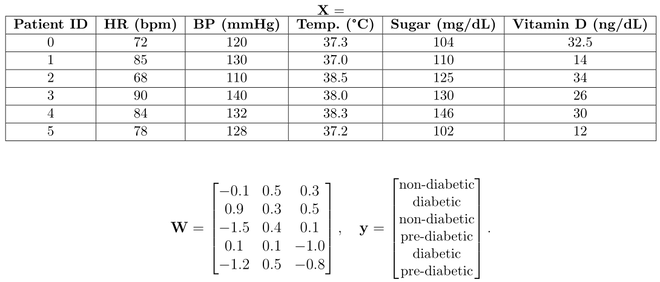

In [20]:
import numpy as np

X = tf.constant([
    [72, 120, 37.3, 104, 32.5],
    [85, 130, 37.0, 110, 14],
    [68, 110, 38.5, 125, 34],
    [90, 140, 38.0, 130, 26],
    [84, 132, 38.3, 146, 30],
    [78, 128, 37.2, 102, 12]])

W = tf.constant([
    [-0.1, 0.5, 0.3],
    [0.9, 0.3, 0.5],
    [-1.5, 0.4, 0.1],
    [0.1, 0.1, -1.0],
    [-1.2, 0.5, -0.8]])

y = tf.constant(['non-diabetic',
                 'diabetic',
                 'non-diabetic',
                 'pre-diabetic',
                 'diabetic',
                 'pre-diabetic'])

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.979883  , -0.70186241, -0.72380331, -0.98707429,  0.89204786],
       [ 0.71858087,  0.3509312 , -1.24493957, -0.60498101, -1.2373567 ],
       [-1.50248727, -1.75465602,  1.36074836,  0.35025217,  1.06470228],
       [ 1.3718362 ,  1.40372481,  0.49218572,  0.66866323,  0.14387869],
       [ 0.5879298 ,  0.56148993,  1.01332198,  1.68757862,  0.60429048],
       [-0.1959766 ,  0.14037248, -0.89751319, -1.11443871, -1.4675626 ]])

In [22]:
def ohe(y):
  y_categories, y_indices = tf.unique(y)
  num_labels = y_categories
  y_ohe = tf.keras.utils.to_categorical(y_indices.numpy())
  return num_labels, y_ohe

In [23]:
y_cats, y_ohe = ohe(y)
print(y_cats)
print(y_ohe)

tf.Tensor([b'non-diabetic' b'diabetic' b'pre-diabetic'], shape=(3,), dtype=string)
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [24]:
X_bias = tf.concat([X, tf.ones([X.shape[0], 1])], axis=1)
X_bias

<tf.Tensor: shape=(6, 6), dtype=float32, numpy=
array([[-0.979883  , -0.7018624 , -0.7238033 , -0.9870743 ,  0.8920479 ,
         1.        ],
       [ 0.71858084,  0.3509312 , -1.2449396 , -0.604981  , -1.2373567 ,
         1.        ],
       [-1.5024873 , -1.754656  ,  1.3607484 ,  0.35025215,  1.0647023 ,
         1.        ],
       [ 1.3718362 ,  1.4037248 ,  0.4921857 ,  0.6686632 ,  0.14387868,
         1.        ],
       [ 0.5879298 ,  0.56148994,  1.013322  ,  1.6875787 ,  0.6042905 ,
         1.        ],
       [-0.1959766 ,  0.14037248, -0.8975132 , -1.1144387 , -1.4675626 ,
         1.        ]], dtype=float32)>

In [25]:
W_bias = tf.concat([W, [0.1]*tf.ones([1, W.shape[1]])], axis=0)
W_bias

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[-0.1,  0.5,  0.3],
       [ 0.9,  0.3,  0.5],
       [-1.5,  0.4,  0.1],
       [ 0.1,  0.1, -1. ],
       [-1.2,  0.5, -0.8],
       [ 0.1,  0.1,  0.1]], dtype=float32)>

In [26]:
# OR
#bias_values = tf.constant([0.1, 0.1, 0.1])
#W_bias = tf.concat([W, tf.reshape(bias_values,[1,-1])], axis=0)
#W_bias

In [27]:
Z=tf.linalg.matmul(X_bias,W_bias)
Z

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[-0.5171479 , -0.54270506, -0.34384048],
       [ 3.6357193 , -0.61258245,  1.9614122 ],
       [-4.612682  , -0.06596476, -2.2940133 ],
       [ 0.382102  ,  1.5427155 ,  0.47886568],
       [-1.5298257 ,  1.4386437 , -1.5125549 ],
       [ 3.241834  , -1.160107  ,  2.3101306 ]], dtype=float32)>

In [28]:
A = softmax(Z)
A

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[0.31605577, 0.30808064, 0.37586352],
       [0.83213615, 0.01188996, 0.15597394],
       [0.00948007, 0.894182  , 0.09633781],
       [0.18891126, 0.60298413, 0.20810463],
       [0.04655596, 0.906077  , 0.047367  ],
       [0.7111689 , 0.00871433, 0.28011677]], dtype=float32)>

In [34]:
y_ohe

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [37]:
from sklearn.preprocessing import OneHotEncoder

ohc = OneHotEncoder()
Y = ohc.fit_transform(y.numpy().reshape(-1, 1))

In [39]:
yhat = tf.gather_nd(A,  tf.stack([tf.range(X.shape[0]), Y.indices], axis=1))
print(yhat)

tf.Tensor([0.30808064 0.83213615 0.894182   0.20810463 0.04655596 0.28011677], shape=(6,), dtype=float32)


In [40]:
## Categorical cross entropy (CCE) loss for each sample
-tf.math.log(yhat)

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([1.1773937 , 0.1837592 , 0.11184592, 1.5697143 , 3.0671003 ,
       1.2725488 ], dtype=float32)>

In [41]:
Y.todense()

matrix([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.]])

In [42]:
## Average training loss across all the samples
print(tf.reduce_mean(-tf.math.log(yhat)))

# Direct TensorFlow function to calculate average CCE loss
cce = tf.keras.losses.CategoricalCrossentropy()
print(cce(Y.todense(), A))

tf.Tensor(1.2303938, shape=(), dtype=float32)
tf.Tensor(1.2303936, shape=(), dtype=float32)


In [43]:
print(Y.todense())
print(A)
print(Y.todense()*A)
print(tf.reduce_sum(Y.todense()*A, axis = 1))
print(-tf.math.log(tf.reduce_sum(Y.todense()*A, axis = 1)))
print(tf.reduce_mean(-tf.math.log(tf.reduce_sum(Y.todense()*A, axis = 1))))

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]
tf.Tensor(
[[0.31605577 0.30808064 0.37586352]
 [0.83213615 0.01188996 0.15597394]
 [0.00948007 0.894182   0.09633781]
 [0.18891126 0.60298413 0.20810463]
 [0.04655596 0.906077   0.047367  ]
 [0.7111689  0.00871433 0.28011677]], shape=(6, 3), dtype=float32)
tf.Tensor(
[[0.         0.30808064 0.        ]
 [0.83213615 0.         0.        ]
 [0.         0.894182   0.        ]
 [0.         0.         0.20810463]
 [0.04655596 0.         0.        ]
 [0.         0.         0.28011677]], shape=(6, 3), dtype=float32)
tf.Tensor([0.30808064 0.83213615 0.894182   0.20810463 0.04655596 0.28011677], shape=(6,), dtype=float32)
tf.Tensor([1.1773937  0.1837592  0.11184592 1.5697143  3.0671003  1.2725488 ], shape=(6,), dtype=float32)
tf.Tensor(1.2303938, shape=(), dtype=float32)
